# Autoregressive AR(p) model

A time series model $\{x_t\}$ is a moving average model of order q, MA(q) if:

$x_t = w_t + \beta_1 w_{t-1} + \beta_2 w_{t-2} + ... + \beta_q w_{t-q}$ where $\{w_t\}$ is a white noise with $\mathbb{E}(w_t) = 0$ and variance $\sigma_w^2$

### Second order properties:

$\mu_x = \mathbb{E}(x_t) = 0$

$\rm{Var}(x_t) = \sigma_w^2 (1 + \beta_1^2 + \beta_2^2 + ... + \beta_q^2)$

$\rm{ACF} = 1$ if k = 0

$\rm{ACF} = \sum_{i=0}^{q-k} \beta_i \beta_{i+k}/ \sum_{i=0}^{q} \beta_i^2$ if k = 1,2,...,q

$\rm{ACF} = 0$ if k > q


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from pandas_datareader import data as wb
import pandas as pd

In [2]:
def autocorr(x,lags):
    corr=[1.0 if l==0 else np.corrcoef(x[l:],x[:-l])[0][1] for l in lags]
    return np.array(corr)

## MA(1) model:

We will start with a MA(1) model: $x_t = w_t + 0.6 w_{t-1}$ where we choose $w_t$ to be a white noise of variance 3.0. We will first test the second order properties of the model and try to obtain the model parameter by fitting it.

In [4]:
t_end = 1000000

x = np.zeros(t_end)

wn = np.random.normal(0.0,3.0,t_end)

x[0] = np.random.normal(0.0,3.0)

for t in range(1,t_end):
    x[t] = wn[t] + 0.6*wn[t-1]
    
lag_list = list(range(0,21))
corr_func = autocorr(x, lag_list)

In [5]:
print('Mean: %s' % np.mean(x))
print('Variance: %s' % np.var(x))

Mean: -0.0025858585271003923
Variance: 12.229109798561561


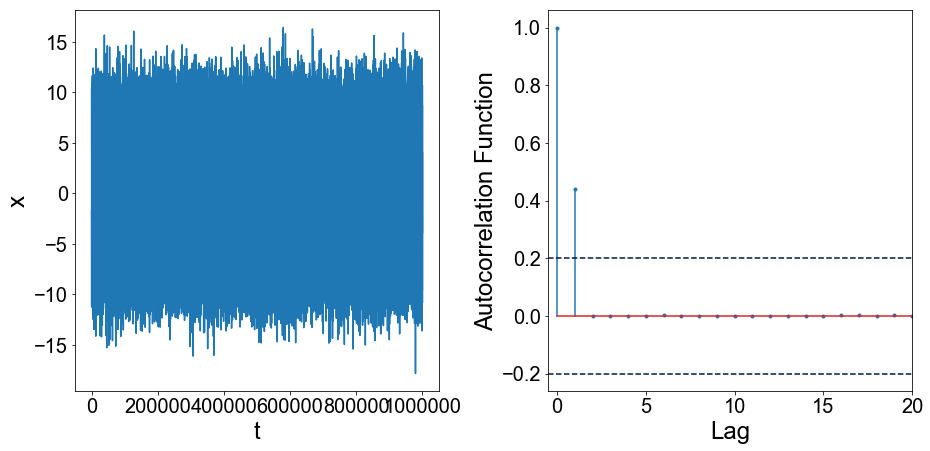

In [6]:
params = {'legend.fontsize': 'x-large',
              'figure.figsize': (15,7),
              'font.family': 'Arial',
              'font.size': 20,
              'axes.labelsize': 24,
              'axes.titlesize': 24,
              'xtick.labelsize': 20,
              'ytick.labelsize': 20,
              'legend.fontsize': 14,
              'legend.loc': 'upper left'}

plt.rcParams.update(params)

plt.subplot(1,2,1)
plt.plot(list(range(0,t_end)), x)
plt.ylabel('x')
plt.xlabel('t')

plt.subplot(1,2,2)
plt.stem(lag_list, corr_func, markerfmt='.')
plt.axhline(y=0.2, color='xkcd:navy', linestyle='--')
plt.axhline(y=-0.2, color='xkcd:navy', linestyle='--')
plt.ylabel('Autocorrelation Function')
plt.xlim(-0.5,20)
plt.xlabel('Lag')


plt.subplots_adjust(wspace = 0.3)

So we see that the second order properties do match. The mean is close to zero and the variance is 12.229, which is close to $\sigma_w^2 (1 + \beta_1^2) = 9(1 + 0.6^2) = 12.24$. We also see that we have one significant peak of the autocorrelation function at $k = 1$. Now, we will try to fit this time series to obtain the lag and the model parameter.

In [7]:
model = ARMA(x, order=(0, 1))
model_fit = model.fit(method='mle', ic='aic', trend='nc')
print('Coefficients: %s' % model_fit.params)

Coefficients: [0.59907446]


In [8]:
print(model_fit.conf_int(0.05))

[[0.59750586 0.60064306]]


Therefore, we see that the fitted model has estimated a coefficient of 0.5990. The 95 % confidence intervals [0.597, 0.6004] contain the true model parameter: 0.6

# MA(3) process:

Now, we will add some complexity to the our moving average model and try fitting a MA(3) process. The simulated process that we would fit is given by:
$x_t = w_t + 0.6w_{t-1} + 0.4w_{t-2} + 0.2w_{t-3}$

where we choose $w_t$ to be a white noise of variance 2.

We will proceed in a similar manner and first plot a realization of the process and analyze its second order properties

In [9]:
t_end = 10000

x = np.zeros(t_end)

wn = np.random.normal(0.0,2.0,t_end)

for t in range(0, 3):
    x[t] = np.random.normal(0.0,3.0)

for t in range(4,t_end):
    x[t] = wn[t] + 0.6*wn[t-1] + 0.4*wn[t-2] + 0.2*wn[t-3]
    
lag_list = list(range(0,21))
corr_func = autocorr(x, lag_list)

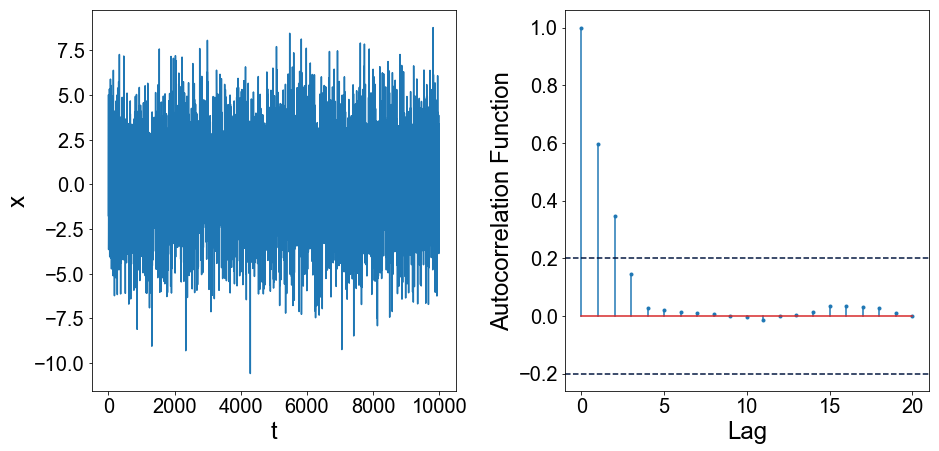

In [11]:
params = {'legend.fontsize': 'x-large',
              'figure.figsize': (15,7),
              'font.family': 'Arial',
              'font.size': 20,
              'axes.labelsize': 24,
              'axes.titlesize': 24,
              'xtick.labelsize': 20,
              'ytick.labelsize': 20,
              'legend.fontsize': 14,
              'legend.loc': 'upper left'}

plt.rcParams.update(params)

plt.subplot(1,2,1)
plt.plot(list(range(0,t_end)), x)
plt.ylabel('x')
plt.xlabel('t')

plt.subplot(1,2,2)
plt.stem(lag_list, corr_func, markerfmt='.')
plt.axhline(y=0.2, color='xkcd:navy', linestyle='--')
plt.axhline(y=-0.2, color='xkcd:navy', linestyle='--')
plt.ylabel('Autocorrelation Function')
plt.xlabel('Lag')

plt.subplots_adjust(wspace = 0.3)

In [12]:
print('Mean: %s' % np.mean(x))
print('Variance: %s' % np.var(x))

Mean: 0.013821853466706465
Variance: 6.250020161461601


Once again a check of the second order properties show us what to expect. The mean is close to zero and the variance is 6.2500, which is close to $\sigma_w^2 (1 + \beta_1^2 + \beta_2^2 + \beta_3^2) = 4(1 + 0.6^2 + 0.4^2 + 0.2^2) = 6.24$. We also see that we have significant peak of the autocorrelation function at $k = 1, 2, 3$. Now, we will try to fit this time series to $\beta$ parameters.

In [13]:
model = ARMA(x, order=(0, 3))
model_fit = model.fit(method='mle', ic='aic', trend='nc')
print('Coefficients: %s' % model_fit.params)

print("95% confidence intervals:")
print(model_fit.conf_int(0.05))

Coefficients: [0.5979885  0.39965813 0.19169984]
95% confidence intervals:
[[0.57879163 0.61718537]
 [0.37876163 0.42055463]
 [0.17275789 0.21064179]]


The obtained coefficients are 0.59798, 0.39965 and 0.1916. The 95 % confidence intervals contain the true parameter values of 0.6, 0.4 and 0.2